## 1. Exploratory Analysis (EDA)

In [112]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

RANDOM_SEED = 666


In [113]:
# Load data
dataset = sns.load_dataset('mpg')
# Check data
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [114]:
# Missing values Analysis
print("Missing Values per Column")
print(dataset.isna().sum())
print("\n" + "="*30 + "\n")

Missing Values per Column
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64




In [115]:
# Statistical Summary for numerical variables
print("Statistical Summary")
dataset.describe()

Statistical Summary


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### Issues Detected During EDA
1. Missing data in column **horsepower**
2. Categorical variables **origin, name** need to be encoded.
3. Normalization needs: columns such as **weight vs cylinders** have distinct scales.

The cleansing and fixing of these issues will be done during preprocessing

## 2. Data Preprocessing


In [116]:
# Create a copy of the original dataset
clean_dataset = dataset.copy()

#1. Missing values handling: imputation using median 
median_hp = clean_dataset['horsepower'].median() 
clean_dataset['horsepower'] = clean_dataset['horsepower'].fillna(median_hp)

# 2. Get Rid of column "name": this column has a unique value for each car.
clean_dataset.drop("name", inplace=True, axis=1)


# Verify null values after deletion
print("Null values after cleansing:")
print(clean_dataset.isna().sum())

# Use One-Hot encoding for "origin" column
clean_dataset = pd.get_dummies(clean_dataset, columns=['origin'], dtype='int')




Null values after cleansing:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [117]:
clean_dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1


## 3. Train Test Split

In [118]:
# 1. Define target and variables
x = clean_dataset.drop('mpg', axis=1)
y = clean_dataset['mpg']

# 2. Split data between train (80%) and test (20%) dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_SEED)




## 4. Data Normalization

In [119]:
# 1. Create an instance of StandardScaler
scaler = StandardScaler()

# 2. fit and transform the TRAINING DATA
x_train_scaled = scaler.fit_transform(x_train)

# 3. Transform (only) the test data with the adjusted scaler
x_test_scaled = scaler.transform(x_test)


## 5. Model Creation

In [120]:
model = keras.Sequential([
    # Input layer 
    keras.layers.Dense(64, input_shape=[x_train_scaled.shape[1]]),
    # Hidden layer
    keras.layers.Dense(32, activation='relu'),
    # Output layer
    keras.layers.Dense(1)
])

model.summary()

c:\Users\MARCE\miniconda3\envs\deep_learn\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

## 6. Model Compiling

In [121]:
#Compiling the model 
model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['mean_absolute_error'] # Métricas para monitorear durante el entrenamiento
              )

Restoring model weights from the end of the best epoch: 99.


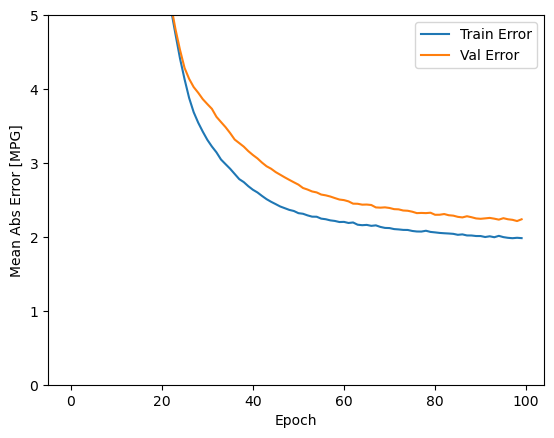

In [122]:
#Early stopping 
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
#Training the model 
history = model.fit(
    x_train_scaled, 
    y_train,
    epochs = 100,
    validation_split=0.2,# We can also use validation_split to hold out a piece of the training data
    verbose=0, # verbose=0 will hide the training output for each epoch
    callbacks = es_callback
)

# Function to plot the training history
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()
    plt.show()
    
plot_history(history)


## 7. Model Evaluation

In [123]:
loss, mae = model.evaluate(x_test_scaled, y_test, verbose=0)
print(f"Average Squared Error in Test dataset: {loss:.2f}")
print(f"Absolute Average Error in test dataset: {mae:.2f} MPG")

Average Squared Error in Test dataset: 11.17
Absolute Average Error in test dataset: 2.36 MPG


The MAE result is our key performance metric. It tells us that, on average, our model's predictions are off by about that many miles per gallon. For a first attempt, getting an error of around 2-3 MPG is a very solid result!

## 8. Making Predictions
 Using our trained model to predict the MPG for a few cars from our test set and see how it did

In [124]:
# Make predictions on the first 10 cars of the test set
predictions = model.predict(x_test_scaled[:10]).flatten()

# Compare predictions with the actual values
for i in range(10):
    print(f"Predicción: {predictions[i]:.1f} MPG, Valor Real: {y_test.iloc[i]:.1f} MPG")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicción: 32.4 MPG, Valor Real: 29.0 MPG
Predicción: 26.6 MPG, Valor Real: 26.0 MPG
Predicción: 33.5 MPG, Valor Real: 32.4 MPG
Predicción: 21.2 MPG, Valor Real: 21.0 MPG
Predicción: 29.3 MPG, Valor Real: 27.0 MPG
Predicción: 27.9 MPG, Valor Real: 27.4 MPG
Predicción: 21.9 MPG, Valor Real: 27.0 MPG
Predicción: 24.4 MPG, Valor Real: 23.8 MPG
Predicción: 18.5 MPG, Valor Real: 17.0 MPG
Predicción: 20.6 MPG, Valor Real: 19.0 MPG
